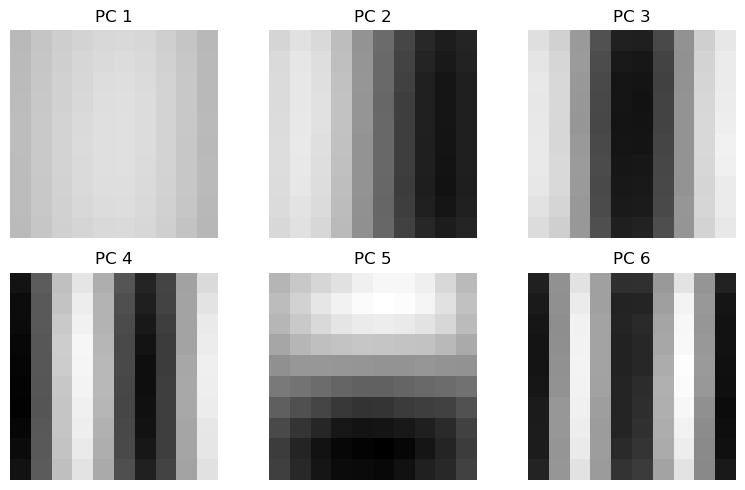

In [3]:
import numpy as np
import matplotlib.pyplot as plt

img = np.loadtxt("Trees.txt")

h, w = img.shape
h = h // 10 * 10
w = w // 10 * 10
img = img[:h, :w]

patches = []
for i in range(0, h, 10):
    for j in range(0, w, 10):
        patch = img[i:i+10, j:j+10]
        patches.append(patch.flatten())

J = np.array(patches)

mean_patch = np.mean(J, axis=0)
J_centered = J - mean_patch

U, S, Vt = np.linalg.svd(J_centered, full_matrices=False)
pcs = Vt[:6]

pc_images = pcs.reshape(6, 10, 10)

vmin = pc_images.min()
vmax = pc_images.max()

fig, axes = plt.subplots(2, 3, figsize=(8, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(pc_images[i], cmap="gray", vmin=vmin, vmax=vmax)
    ax.set_title(f"PC {i+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()
